In [74]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
import os
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [75]:
#generate the normal distribution
dist_n = np.random.randn(1000)

#test ad and ks
print "normal on normal KS test: ", scipy.stats.kstest(dist_n,'norm')
print "normal on normal AD test: ", scipy.stats.anderson(dist_n, dist='norm')
print "" 

#generate the binomial distribution
dist_b1 = np.random.binomial(10, 0.5, 1000)
dist_b2 = np.random.binomial(50, 0.5, 1000)

print "binomial smaller on normal KS test: ", scipy.stats.kstest(dist_b1,'norm')
print "binomial larger on normal KS test: ", scipy.stats.kstest(dist_b2,'norm')
#print "binomial on normal AD test: ", scipy.stats.anderson(dist_b, dist='norm')

threshold = scipy.stats.anderson(dist_n, dist='norm')[1][scipy.stats.anderson(dist_n, dist='norm')[2]==[1.0]]
print threshold

#This threshold is looking up the 1.0 significance level critical value


normal on normal KS test:  (0.024960454592368952, 0.56161464115344983)
normal on normal AD test:  (0.1559964591968992, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

binomial smaller on normal KS test:  (0.96524986805182078, 0.0)
binomial larger on normal KS test:  (1.0, 0.0)
[ 1.088]


In [76]:
narray = range(1,100,1) #create array of increasing sizes 1 through 49

ks_b = np.zeros(len(narray)) #empty array as a holder for our KS statistics
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))

for i,n in enumerate(narray):
    #generate the distribution
    dist_b = np.random.binomial(n, 0.5,100)
    ks_b[i] = scipy.stats.kstest(dist_b,'norm')[0]
    ad_b[i] = scipy.stats.anderson(dist_b,'norm')[0]
    mybins=np.linspace(min(dist_b),max(dist_b), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
    kl_b[i] = scipy.stats.entropy(np.histogram(dist_b, bins=mybins)[0], scipy.stats.norm.pdf(bincenters)+n)
print "Our array of KS values: ", ks_b
print "Our array of Anderson values: ", ad_b
print "Our array of KL values: ", kl_b

threshold = scipy.stats.anderson(dist_b, dist='norm')[1][scipy.stats.anderson(dist_b, dist='norm')[2]==[1.0]]
print threshold

Our array of KS values:  [ 0.5         0.57134475  0.68134475  0.79134475  0.81134475  0.85724987
  0.92724987  0.95724987  0.97724987  0.97724987  0.97724987  0.9886501
  0.9986501   0.9986501   0.9886501   0.9986501   0.99996833  0.99999971
  0.99996833  0.99999971  1.          0.99999971  1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.

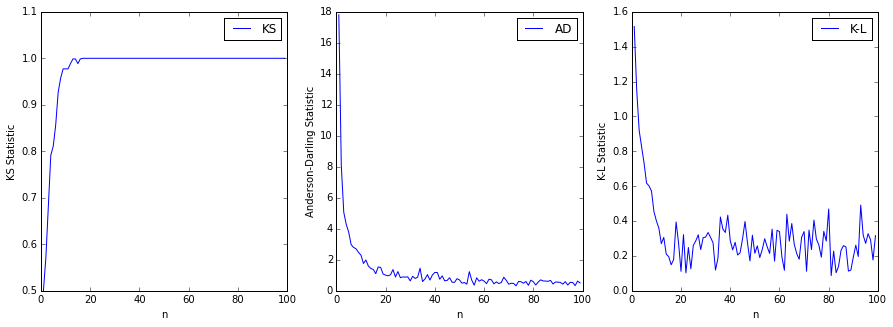

In [77]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.xlabel('n')
pl.legend()
pl.ylabel('KS Statistic')

fig.add_subplot(132)
pl.plot(narray, ad_b, label='AD')
pl.legend()
pl.xlabel('n')
pl.ylabel('Anderson-Darling Statistic')

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L')
pl.legend()
pl.xlabel('n')
pl.ylabel('K-L Statistic')


##Caption: With increasing n for a binomial distribution, we demonstrate the change in the KS, AD and KL statistic when compared to a normal distribution.

In [78]:
narray = range(1,50,1)
ks_p = np.zeros(len(narray))
ad_p = np.zeros(len(narray))
kl_p = np.zeros(len(narray))
chi2_p = np.zeros(len(narray))

In [79]:
for i,n in enumerate(narray):
    #generate the distribution
    dist_p = np.random.poisson(n,100)
    ks_p[i] = scipy.stats.kstest(dist_p,'norm')[0]
    ad_p[i] = scipy.stats.anderson(dist_p,'norm')[0]
    mybins=np.linspace(min(dist_p),max(dist_p), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
    kl_p[i] = scipy.stats.entropy(np.histogram(dist_p, bins=mybins)[0], scipy.stats.norm.pdf(bincenters)+n)
print "Our array of KS values: ", ks_p
print "Our array of Anderson values: ", ad_p
print "Our array of KL values: ", kl_p

Our array of KS values:  [ 0.54134475  0.67134475  0.78134475  0.87724987  0.95724987  0.94724987
  0.95724987  0.9986501   0.98996833  0.99996833  0.99996833  0.98996833
  1.          1.          0.99999971  0.99999971  1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.        ]
Our array of Anderson values:  [ 5.60594592  2.98843366  1.68538773  1.71909843  1.81167485  0.9673753
  0.73097868  1.58602374  0.62718711  0.60620318  0.64422382  1.08651926
  0.58882198  0.62835825  0.95623521  0.59485098  0.56703766  0.44153076
  0.70311941  0.44441692  0.46461154  0.59205017  0.62873175  0.44939062
  0.28003188  0.34713638  1.43754096  0.67711754  0.39529349  0.56053349
  0.33534083  0.3221230

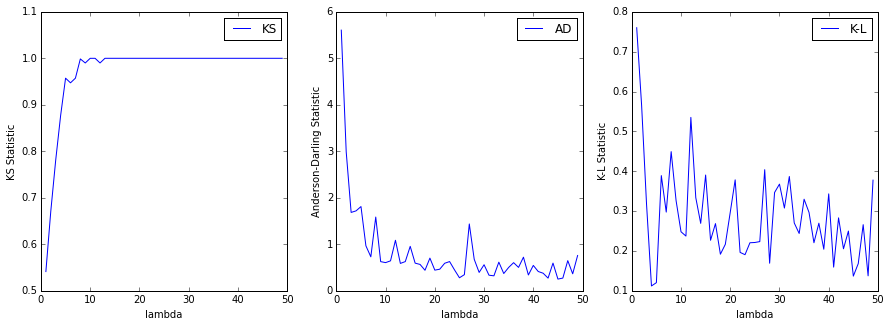

In [80]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_p, label='KS')
pl.xlabel('lambda')
pl.legend()
pl.ylabel('KS Statistic')

fig.add_subplot(132)
pl.plot(narray, ad_p, label='AD')
pl.legend()
pl.xlabel('lambda')
pl.ylabel('Anderson-Darling Statistic')

fig.add_subplot(133)
pl.plot(narray, kl_p, label='K-L')
pl.legend()
pl.xlabel('lambda')
pl.ylabel('K-L Statistic')

##Caption: With increasing lambda for a Poisson distribution, we demonstrate the change in the KS, AD and KL statistic when compared to a normal distribution.